In [72]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from collections import defaultdict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score 
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score
from scikitplot.metrics import plot_roc, plot_lift_curve

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Data Preparation

In [64]:
def getting_data_ready():

    # for loading all the data
    df = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatrainingcopy.csv')
    df_test1 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatestcopy.csv')
    df_test2 = pd.read_csv('/Users/piyush2017/Code/2020_Data_Mining_Project_02/data_mining_2020_project_occupancy_detection/data/scaled_datatest2copy.csv')

    class_name = "Occupancy"

    attributes = [col for col in df.columns if col != class_name]
    X = df[attributes].values
    y = df[class_name]

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

    attributes = [col for col in df.columns if col != class_name]
    X_test1 = df_test1[attributes].values
    y_test1 = df_test1[class_name]


    attributes = [col for col in df.columns if col != class_name]
    X_test2 = df_test2[attributes].values
    y_test2 = df_test2[class_name]
    
    
    return X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2

In [65]:
X_train, X_test, y_train, y_test, X_test1, y_test1, X_test2, y_test2 = getting_data_ready()

# this is list to be used in testing automation

tests = [(X_test,y_test),(X_test1,y_test1),
         (X_test2,y_test2)]




In [66]:
feature_names = list(df.columns)

NameError: name 'df' is not defined

In [39]:
feature_names = feature_names[:6]
feature_names

['Temperature', 'Humidity', 'Light', 'CO2', 'HumidityRatio', 'Week_day']

# Data Partitioning

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score 

from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [4]:
attributes = [col for col in df.columns if col != class_name]
X = df[attributes].values
y = df[class_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100, stratify=y)

In [5]:
X_train.shape

(5700, 6)

In [6]:
np.sqrt(71)

8.426149773176359

# Random Forest

In [8]:
from sklearn.ensemble import RandomForestClassifier

In [10]:
import pickle
pickle.dump(clf, 'filename.pickle')
clf = pickle.load('filename.pickle')

TypeError: file must have a 'write' attribute

In [9]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9930413426115432
F1-score [0.99558785 0.98354308]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [10]:
def show_report(tests):
    for test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for ================== \n')
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plt.show()


 ===============Results for ================== 

Accuracy 0.9930413426115432
F1-score [0.99558785 0.98354308]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



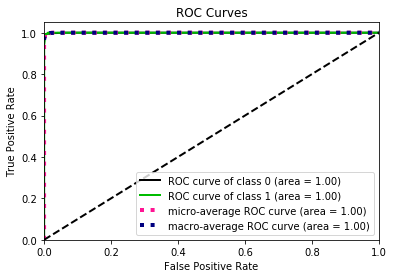


 ===============Results for ================== 

Accuracy 0.9279549718574108
F1-score [0.94520548 0.89485214]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1693
           1       0.96      0.84      0.89       972

    accuracy                           0.93      2665
   macro avg       0.94      0.91      0.92      2665
weighted avg       0.93      0.93      0.93      2665



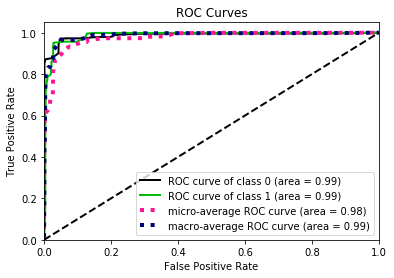


 ===============Results for ================== 

Accuracy 0.9532403609515997
F1-score [0.97114289 0.87682334]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7703
           1       0.98      0.79      0.88      2049

    accuracy                           0.95      9752
   macro avg       0.96      0.89      0.92      9752
weighted avg       0.95      0.95      0.95      9752



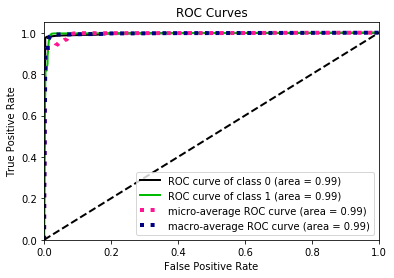

In [11]:
show_report(tests)

In [12]:
df_report = pd.DataFrame()

for test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score      support
0              0.994298  0.996881  0.995588  1924.000000
1              0.988327  0.978805  0.983543   519.000000
accuracy       0.993041  0.993041  0.993041     0.993041
macro avg      0.991312  0.987843  0.989565  2443.000000
weighted avg   0.993029  0.993041  0.993029  2443.000000
              precision    recall  f1-score      support
0              0.914412  0.978145  0.945205  1693.000000
1              0.956674  0.840535  0.894852   972.000000
accuracy       0.927955  0.927955  0.927955     0.927955
macro avg      0.935543  0.909340  0.920029  2665.000000
weighted avg   0.929826  0.927955  0.926840  2665.000000
              precision    recall  f1-score     support
0              0.947401  0.996105  0.971143  7703.00000
1              0.981851  0.792094  0.876823  2049.00000
accuracy       0.953240  0.953240  0.953240     0.95324
macro avg      0.964626  0.894100  0.923983  9752.00000
weighted avg   0.954639  0.953240  0

In [13]:
# this code will delete unwanted things

df_report.drop(['support'], axis=1, inplace=True)
df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

df_report.to_excel('/Users/piyush2017/Downloads/07_ensemble.xlsx')
df_report.head(5)

,precision,recall,f1-score,precision,recall,f1-score,precision,recall,f1-score
0,0.994298,0.996881,0.995588,0.914412,0.978145,0.945205,0.947401,0.996105,0.971143
1,0.988327,0.978805,0.983543,0.956674,0.840535,0.894852,0.981851,0.792094,0.876823
accuracy,0.993041,0.993041,0.993041,0.927955,0.927955,0.927955,0.953240,0.953240,0.953240


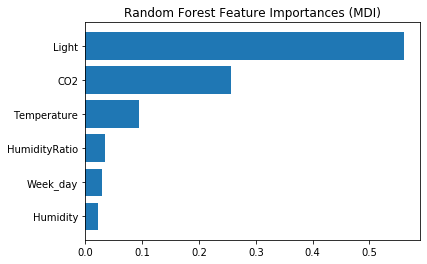

In [27]:
nbr_features = 15

tree_feature_importances = clf.feature_importances_
sorted_idx = tree_feature_importances.argsort()[-nbr_features:]

y_ticks = np.arange(0, len(sorted_idx))
fig, ax = plt.subplots()
plt.barh(y_ticks, tree_feature_importances[sorted_idx])
plt.yticks(y_ticks, np.array(feature_names)[sorted_idx])
plt.title("Random Forest Feature Importances (MDI)")
plt.show()

In [28]:
from sklearn.inspection import permutation_importance

In [29]:
result = permutation_importance(clf, X_test, y_test, n_repeats=10, random_state=42, n_jobs=2)

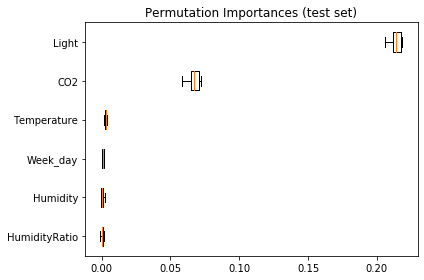

In [30]:
sorted_idx = result.importances_mean.argsort()[-nbr_features:]

fig, ax = plt.subplots()
plt.boxplot(result.importances[sorted_idx].T, vert=False, labels=np.array(feature_names)[sorted_idx])
plt.title("Permutation Importances (test set)")
plt.tight_layout()
plt.show()

In [32]:
import pydotplus
from sklearn import tree
from IPython.display import Image

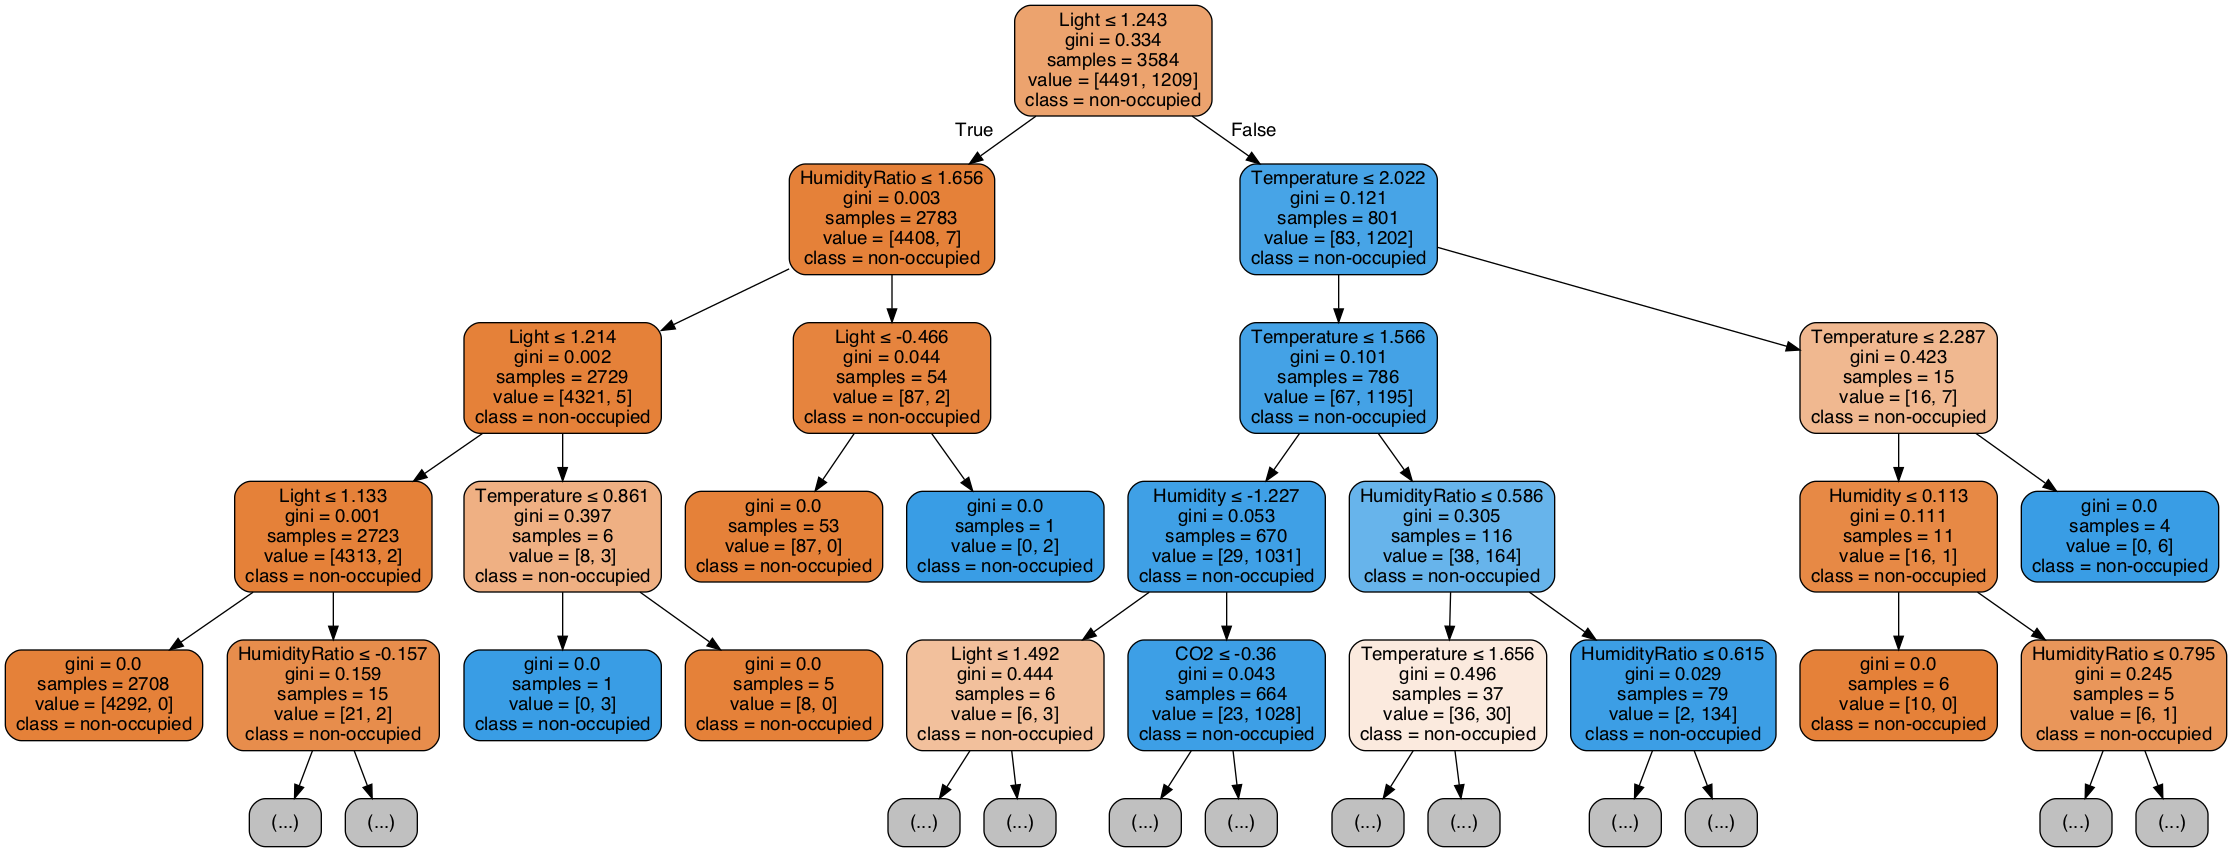

In [41]:
dot_data = tree.export_graphviz(clf.estimators_[0], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['non-occupied', 'non-occupied'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

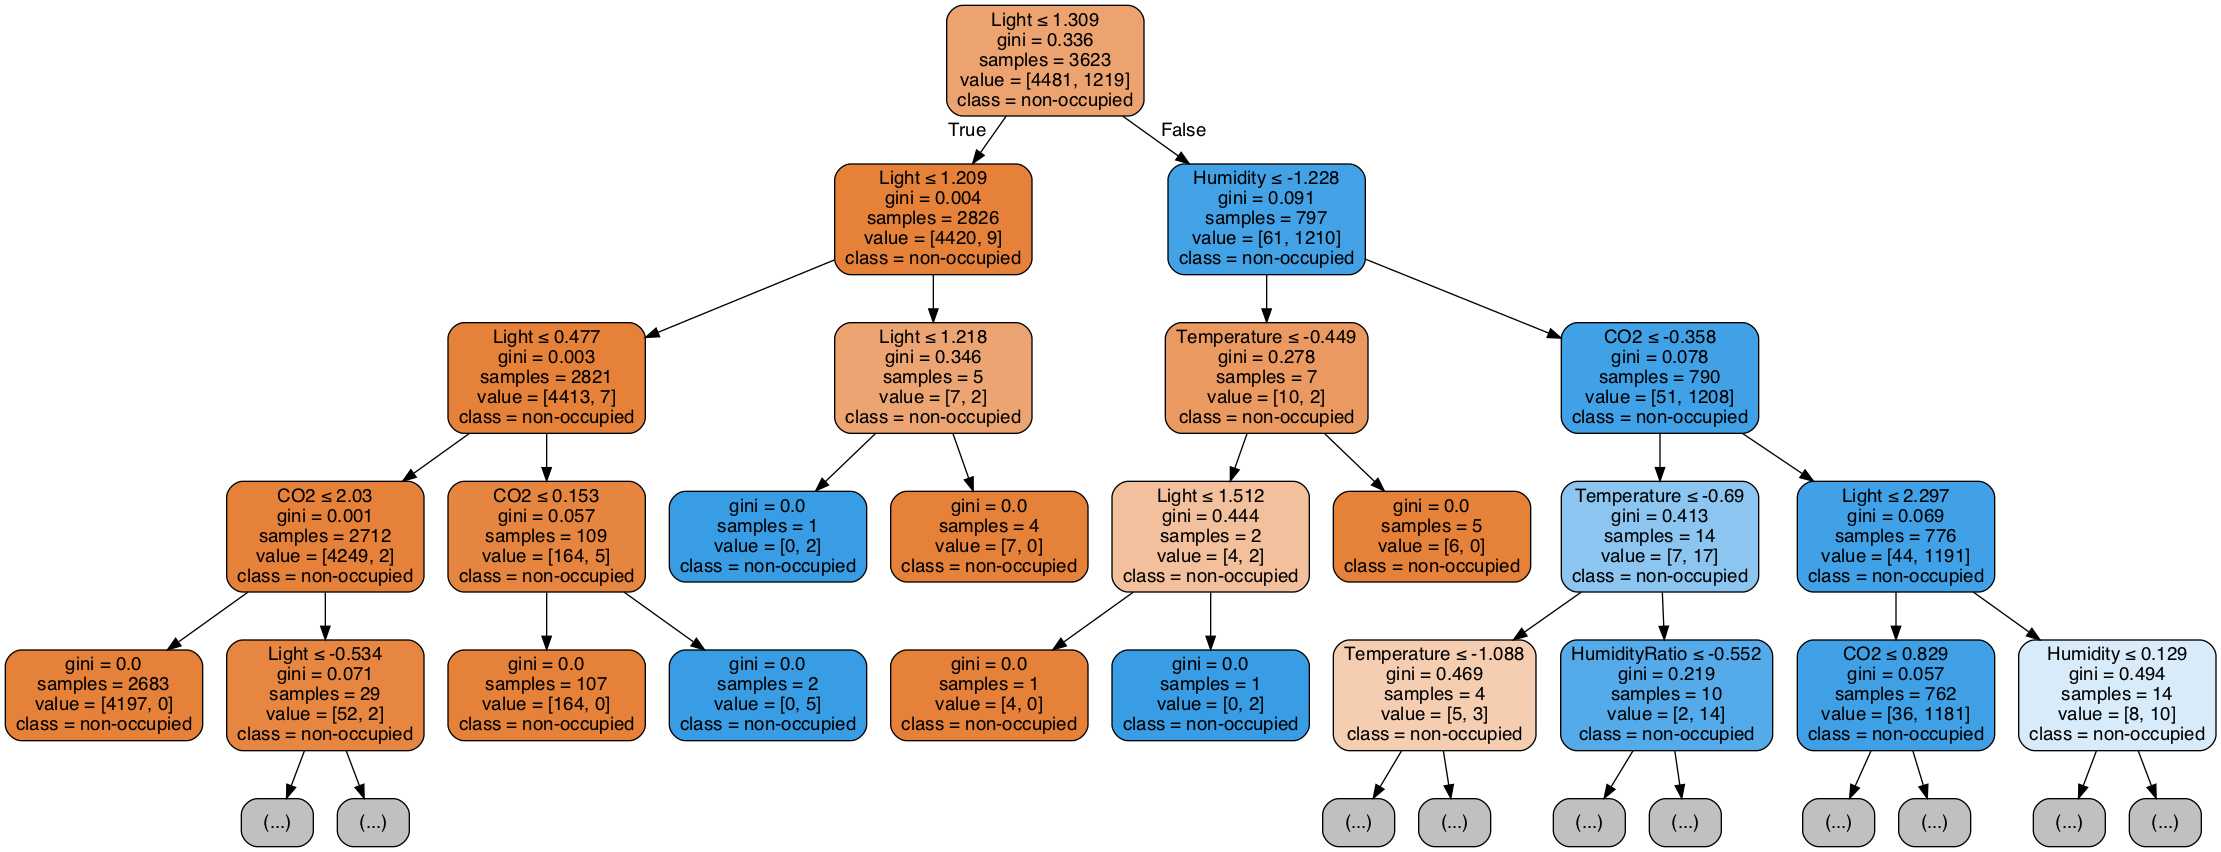

In [42]:
dot_data = tree.export_graphviz(clf.estimators_[1], out_file=None,  
                                feature_names=feature_names, 
                                class_names=['non-occupied', 'non-occupied'],  
                                filled=True, rounded=True,  
                                special_characters=True, max_depth=4)  
graph = pydotplus.graph_from_dot_data(dot_data)  
Image(graph.create_png())

In [16]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=4, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9938600081866558
F1-score [0.99610895 0.98545102]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [17]:
def show_report(tests):
    for test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for ================== \n')
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plt.show()


 ===============Results for ================== 

Accuracy 0.9938600081866558
F1-score [0.99610895 0.98545102]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



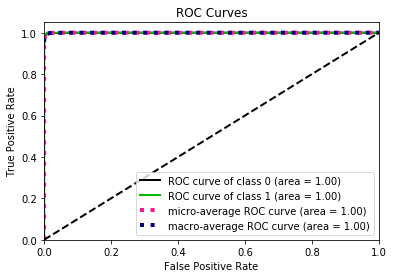


 ===============Results for ================== 

Accuracy 0.8840525328330207
F1-score [0.9159641  0.81306715]
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      1693
           1       0.99      0.69      0.81       972

    accuracy                           0.88      2665
   macro avg       0.92      0.84      0.86      2665
weighted avg       0.90      0.88      0.88      2665



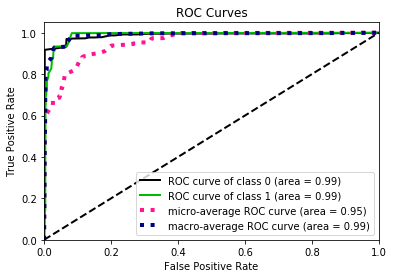


 ===============Results for ================== 

Accuracy 0.9387817883511075
F1-score [0.9625588  0.83225625]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7703
           1       0.98      0.72      0.83      2049

    accuracy                           0.94      9752
   macro avg       0.96      0.86      0.90      9752
weighted avg       0.94      0.94      0.94      9752



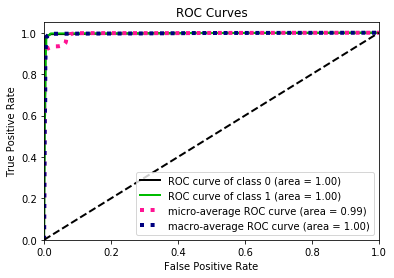

In [18]:
show_report(tests)

In [22]:
df_report = pd.DataFrame()

for test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score     support
0              0.994303  0.997921  0.996109  1924.00000
1              0.992188  0.978805  0.985451   519.00000
accuracy       0.993860  0.993860  0.993860     0.99386
macro avg      0.993245  0.988363  0.990780  2443.00000
weighted avg   0.993854  0.993860  0.993845  2443.00000
              precision    recall  f1-score      support
0              0.848790  0.994684  0.915964  1693.000000
1              0.986784  0.691358  0.813067   972.000000
accuracy       0.884053  0.884053  0.884053     0.884053
macro avg      0.917787  0.843021  0.864516  2665.000000
weighted avg   0.899121  0.884053  0.878435  2665.000000
              precision    recall  f1-score      support
0              0.931085  0.996235  0.962559  7703.000000
1              0.980795  0.722792  0.832256  2049.000000
accuracy       0.938782  0.938782  0.938782     0.938782
macro avg      0.955940  0.859513  0.897408  9752.000000
weighted avg   0.941529  0.938782  0.

In [23]:
# this code will delete unwanted things

df_report.drop(['support'], axis=1, inplace=True)
df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

df_report.to_excel('/Users/piyush2017/Downloads/07_ensemble.xlsx')
df_report.head(5)

,precision,recall,f1-score,precision,recall,f1-score,precision,recall,f1-score
0,0.994303,0.997921,0.996109,0.848790,0.994684,0.915964,0.931085,0.996235,0.962559
1,0.992188,0.978805,0.985451,0.986784,0.691358,0.813067,0.980795,0.722792,0.832256
accuracy,0.993860,0.993860,0.993860,0.884053,0.884053,0.884053,0.938782,0.938782,0.938782


In [24]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=None, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9930413426115432
F1-score [0.99558785 0.98354308]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [25]:
def show_report(tests):
    for test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for ================== \n')
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plt.show()


 ===============Results for ================== 

Accuracy 0.9930413426115432
F1-score [0.99558785 0.98354308]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



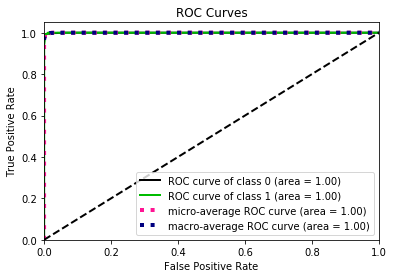


 ===============Results for ================== 

Accuracy 0.9279549718574108
F1-score [0.94520548 0.89485214]
              precision    recall  f1-score   support

           0       0.91      0.98      0.95      1693
           1       0.96      0.84      0.89       972

    accuracy                           0.93      2665
   macro avg       0.94      0.91      0.92      2665
weighted avg       0.93      0.93      0.93      2665



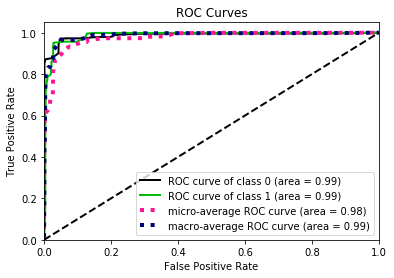


 ===============Results for ================== 

Accuracy 0.9532403609515997
F1-score [0.97114289 0.87682334]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      7703
           1       0.98      0.79      0.88      2049

    accuracy                           0.95      9752
   macro avg       0.96      0.89      0.92      9752
weighted avg       0.95      0.95      0.95      9752



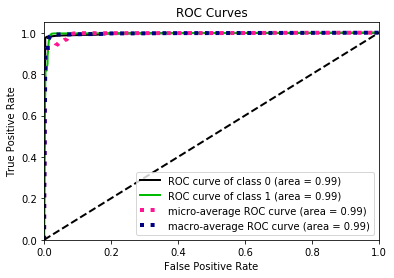

In [26]:
show_report(tests)

In [27]:
df_report = pd.DataFrame()

for test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score      support
0              0.994298  0.996881  0.995588  1924.000000
1              0.988327  0.978805  0.983543   519.000000
accuracy       0.993041  0.993041  0.993041     0.993041
macro avg      0.991312  0.987843  0.989565  2443.000000
weighted avg   0.993029  0.993041  0.993029  2443.000000
              precision    recall  f1-score      support
0              0.914412  0.978145  0.945205  1693.000000
1              0.956674  0.840535  0.894852   972.000000
accuracy       0.927955  0.927955  0.927955     0.927955
macro avg      0.935543  0.909340  0.920029  2665.000000
weighted avg   0.929826  0.927955  0.926840  2665.000000
              precision    recall  f1-score     support
0              0.947401  0.996105  0.971143  7703.00000
1              0.981851  0.792094  0.876823  2049.00000
accuracy       0.953240  0.953240  0.953240     0.95324
macro avg      0.964626  0.894100  0.923983  9752.00000
weighted avg   0.954639  0.953240  0

In [28]:
# this code will delete unwanted things

df_report.drop(['support'], axis=1, inplace=True)
df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

df_report.to_excel('/Users/piyush2017/Downloads/07_ensemble.xlsx')
df_report.head(5)

,precision,recall,f1-score,precision,recall,f1-score,precision,recall,f1-score
0,0.994298,0.996881,0.995588,0.914412,0.978145,0.945205,0.947401,0.996105,0.971143
1,0.988327,0.978805,0.983543,0.956674,0.840535,0.894852,0.981851,0.792094,0.876823
accuracy,0.993041,0.993041,0.993041,0.927955,0.927955,0.927955,0.953240,0.953240,0.953240


# done till here

In [29]:
clf = RandomForestClassifier(n_estimators=100, criterion='gini', max_depth=4, min_samples_split=2, 
                             min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='log2', random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9897666803110929
F1-score [0.99347769 0.97625831]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



In [30]:
def show_report(tests):
    for test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for ================== \n')
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plt.show()


 ===============Results for ================== 

Accuracy 0.9897666803110929
F1-score [0.99347769 0.97625831]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.96      0.99      0.98       519

    accuracy                           0.99      2443
   macro avg       0.98      0.99      0.98      2443
weighted avg       0.99      0.99      0.99      2443



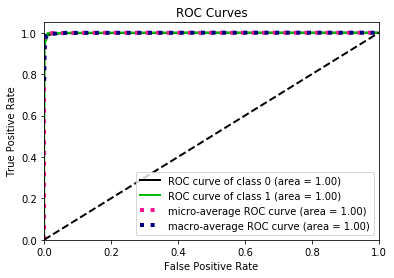


 ===============Results for ================== 

Accuracy 0.9163227016885553
F1-score [0.93755251 0.87322342]
              precision    recall  f1-score   support

           0       0.89      0.99      0.94      1693
           1       0.98      0.79      0.87       972

    accuracy                           0.92      2665
   macro avg       0.93      0.89      0.91      2665
weighted avg       0.92      0.92      0.91      2665



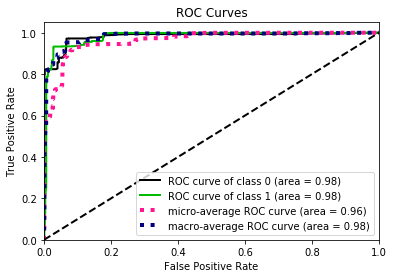


 ===============Results for ================== 

Accuracy 0.9858490566037735
F1-score [0.99107605 0.96584158]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7703
           1       0.98      0.95      0.97      2049

    accuracy                           0.99      9752
   macro avg       0.98      0.97      0.98      9752
weighted avg       0.99      0.99      0.99      9752



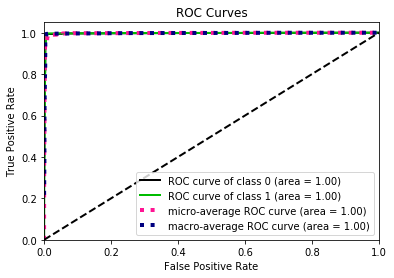

In [31]:
show_report(tests)

In [34]:
df_report = pd.DataFrame()

for test, results in tests:
    
    y_pred = clf.predict(test)
    results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
    print(results.T)
    df_report = pd.concat([df_report, results.T], axis=1 )

              precision    recall  f1-score      support
0              0.997381  0.989605  0.993478  1924.000000
1              0.962547  0.990366  0.976258   519.000000
accuracy       0.989767  0.989767  0.989767     0.989767
macro avg      0.979964  0.989986  0.984868  2443.000000
weighted avg   0.989981  0.989767  0.989820  2443.000000
              precision    recall  f1-score      support
0              0.891374  0.988777  0.937553  1693.000000
1              0.975858  0.790123  0.873223   972.000000
accuracy       0.916323  0.916323  0.916323     0.916323
macro avg      0.933616  0.889450  0.905388  2665.000000
weighted avg   0.922187  0.916323  0.914090  2665.000000
              precision    recall  f1-score      support
0              0.987373  0.994807  0.991076  7703.000000
1              0.979910  0.952172  0.965842  2049.000000
accuracy       0.985849  0.985849  0.985849     0.985849
macro avg      0.983641  0.973490  0.978459  9752.000000
weighted avg   0.985805  0.9858

In [70]:
def doall():
    
    for test, results in tests:

        y_pred = clf.predict(test)
        print('\n ===============Results for {}================== \n')
        print('Accuracy %s' % accuracy_score(results, y_pred))
        print('F1-score %s' % f1_score(results, y_pred, average=None))
        print(classification_report(results, y_pred))
        y_score = clf.predict_proba(test)
        plot_roc(results, y_score)
        plot_lift_curve(results, y_score)
        cm=confusion_matrix(test, y_pred, labels=None, sample_weight=None, normalize=None)
        print(cm)
        sns.heatmap(cm, annot=True,fmt="d",cmap='Oranges')
        plt.show()
        
    
    
    df_report = pd.DataFrame()

    for test, results in tests:
    
        y_pred = clf.predict(test)
        results = pd.DataFrame(classification_report(results, y_pred, output_dict=True))
        print(results.T)
        df_report = pd.concat([df_report, results.T], axis=1 )

    # this code will delete unwanted things

    df_report.drop(['support'], axis=1, inplace=True)
    df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

    df_report.to_excel('/Users/piyush2017/Downloads/07_ensemble.xlsx')
    df_report.head(5)

In [35]:
# this code will delete unwanted things

df_report.drop(['support'], axis=1, inplace=True)
df_report.drop(['macro avg','weighted avg'], axis=0,inplace=True)

df_report.to_excel('/Users/piyush2017/Downloads/07_ensemble.xlsx')
df_report.head(5)

,precision,recall,f1-score,precision,recall,f1-score,precision,recall,f1-score
0,0.997381,0.989605,0.993478,0.891374,0.988777,0.937553,0.987373,0.994807,0.991076
1,0.962547,0.990366,0.976258,0.975858,0.790123,0.873223,0.979910,0.952172,0.965842
accuracy,0.989767,0.989767,0.989767,0.916323,0.916323,0.916323,0.985849,0.985849,0.985849


### Cross Validation

In [46]:
from sklearn.model_selection import cross_val_score

In [47]:
clf = RandomForestClassifier()
scores = cross_val_score(clf, X, y, cv=5)

print('Accuracy %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Accuracy 0.964 +/- 0.039


### Tuning the hyper-parameters

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [73]:
param_list = {'min_samples_split': [2, 5, 10, 20],
              'min_samples_leaf': [1, 5, 10, 20],
             }

grid_search = GridSearchCV(clf, param_grid=param_list, cv=5)
grid_search.fit(X_train, y_train)
clf = grid_search.best_estimator_

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

ValueError: Invalid parameter min_samples_leaf for estimator AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         n_estimators=100,
                                                         n_jobs=None,
                                                         oob_score=False,
                                                         random_state=None,
                                                         verbose=0,
                                                         warm_start=False),
                   learning_rate=1.0, n_estimators=100, random_state=0). Check the list of available parameters with `estimator.get_params().keys()`.


 ===============Results for {}================== 

Accuracy 0.994269340974212
F1-score [0.99636175 0.98651252]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.99      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

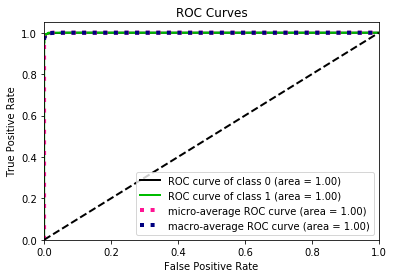

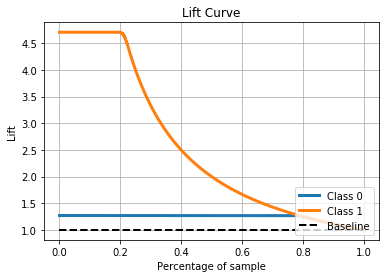

In [74]:
doall()

In [42]:
param_list = {'max_depth': [None] + list(np.arange(2, 20)),
              'min_samples_split': [2, 5, 10, 20, 30, 50, 100],
              'min_samples_leaf': [1, 5, 10, 20, 30, 50, 100],
             }

random_search = RandomizedSearchCV(clf, param_distributions=param_list, n_iter=20, cv=5)
random_search.fit(X_train, y_train)
clf = random_search.best_estimator_


y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9918133442488744
F1-score [0.99479979 0.98076923]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [43]:
random_search.cv_results_['params'][random_search.cv_results_['rank_test_score'][0]]

{'min_samples_split': 30, 'min_samples_leaf': 30, 'max_depth': 14}


 ===============Results for ================== 

Accuracy 0.9918133442488744
F1-score [0.99479979 0.98076923]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



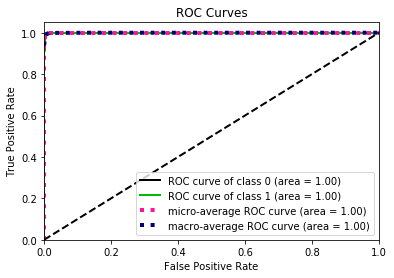


 ===============Results for ================== 

Accuracy 0.9223264540337711
F1-score [0.94124326 0.88544549]
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      1693
           1       0.96      0.82      0.89       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.93      0.92      0.92      2665



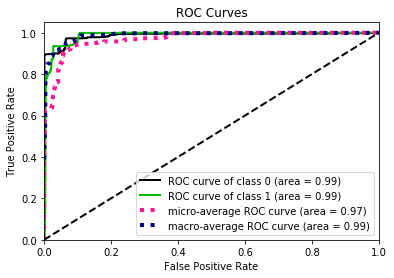


 ===============Results for ================== 

Accuracy 0.9748769483182936
F1-score [0.98427976 0.93748405]
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      7703
           1       0.98      0.90      0.94      2049

    accuracy                           0.97      9752
   macro avg       0.98      0.95      0.96      9752
weighted avg       0.98      0.97      0.97      9752



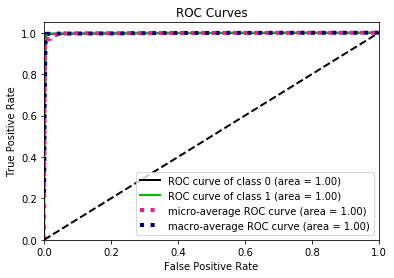

              precision    recall  f1-score      support
0              0.995317  0.994283  0.994800  1924.000000
1              0.978887  0.982659  0.980769   519.000000
accuracy       0.991813  0.991813  0.991813     0.991813
macro avg      0.987102  0.988471  0.987785  2443.000000
weighted avg   0.991827  0.991813  0.991819  2443.000000
              precision    recall  f1-score      support
0              0.906011  0.979327  0.941243  1693.000000
1              0.958084  0.823045  0.885445   972.000000
accuracy       0.922326  0.922326  0.922326     0.922326
macro avg      0.932047  0.901186  0.913344  2665.000000
weighted avg   0.925003  0.922326  0.920892  2665.000000
              precision    recall  f1-score      support
0              0.973103  0.995716  0.984280  7703.000000
1              0.982353  0.896535  0.937484  2049.000000
accuracy       0.974877  0.974877  0.974877     0.974877
macro avg      0.977728  0.946125  0.960882  9752.000000
weighted avg   0.975047  0.9748

In [45]:
doall()

# Bagging

In [46]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier

If None, then the base estimator is a decision tree.

In [47]:
clf = BaggingClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9922226770364306
F1-score [0.99507644 0.98149951]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.97      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443




 ===============Results for ================== 

Accuracy 0.9922226770364306
F1-score [0.99507644 0.98149951]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.97      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



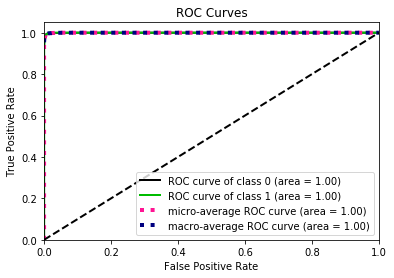


 ===============Results for ================== 

Accuracy 0.874671669793621
F1-score [0.90982721 0.79458795]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1693
           1       0.99      0.66      0.79       972

    accuracy                           0.87      2665
   macro avg       0.91      0.83      0.85      2665
weighted avg       0.89      0.87      0.87      2665



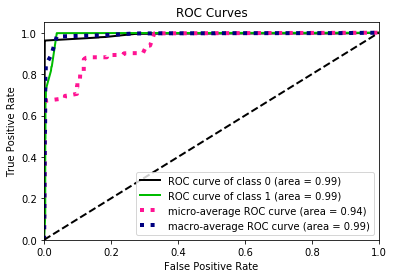


 ===============Results for ================== 

Accuracy 0.9358080393765381
F1-score [0.96079659 0.8229638 ]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7703
           1       0.98      0.71      0.82      2049

    accuracy                           0.94      9752
   macro avg       0.95      0.85      0.89      9752
weighted avg       0.94      0.94      0.93      9752



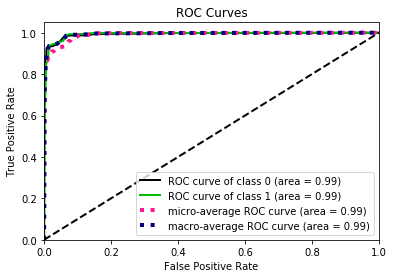

              precision    recall  f1-score      support
0              0.992248  0.997921  0.995076  1924.000000
1              0.992126  0.971098  0.981500   519.000000
accuracy       0.992223  0.992223  0.992223     0.992223
macro avg      0.992187  0.984510  0.988288  2443.000000
weighted avg   0.992222  0.992223  0.992192  2443.000000
              precision    recall  f1-score      support
0              0.837892  0.995275  0.909827  1693.000000
1              0.987768  0.664609  0.794588   972.000000
accuracy       0.874672  0.874672  0.874672     0.874672
macro avg      0.912830  0.829942  0.852208  2665.000000
weighted avg   0.892556  0.874672  0.867796  2665.000000
              precision    recall  f1-score      support
0              0.928131  0.995846  0.960797  7703.000000
1              0.978480  0.710102  0.822964  2049.000000
accuracy       0.935808  0.935808  0.935808     0.935808
macro avg      0.953305  0.852974  0.891880  9752.000000
weighted avg   0.938710  0.9358

In [48]:
doall()

In [54]:
clf = BaggingClassifier(base_estimator=SVC(C=1000), n_estimators=10, random_state=0)

clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9905853458862055
F1-score [0.99402132 0.97786333]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1924
           1       0.98      0.98      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443




 ===============Results for ================== 

Accuracy 0.9922226770364306
F1-score [0.99507644 0.98149951]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.97      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



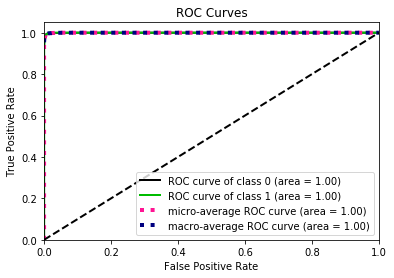


 ===============Results for ================== 

Accuracy 0.874671669793621
F1-score [0.90982721 0.79458795]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1693
           1       0.99      0.66      0.79       972

    accuracy                           0.87      2665
   macro avg       0.91      0.83      0.85      2665
weighted avg       0.89      0.87      0.87      2665



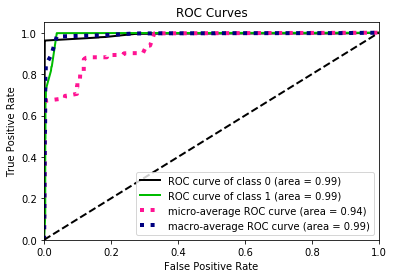


 ===============Results for ================== 

Accuracy 0.9358080393765381
F1-score [0.96079659 0.8229638 ]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7703
           1       0.98      0.71      0.82      2049

    accuracy                           0.94      9752
   macro avg       0.95      0.85      0.89      9752
weighted avg       0.94      0.94      0.93      9752



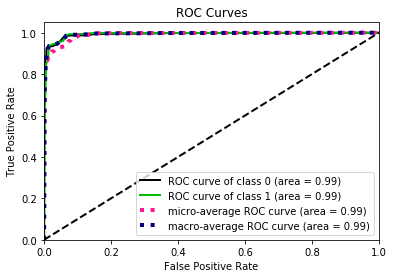

              precision    recall  f1-score      support
0              0.992248  0.997921  0.995076  1924.000000
1              0.992126  0.971098  0.981500   519.000000
accuracy       0.992223  0.992223  0.992223     0.992223
macro avg      0.992187  0.984510  0.988288  2443.000000
weighted avg   0.992222  0.992223  0.992192  2443.000000
              precision    recall  f1-score      support
0              0.837892  0.995275  0.909827  1693.000000
1              0.987768  0.664609  0.794588   972.000000
accuracy       0.874672  0.874672  0.874672     0.874672
macro avg      0.912830  0.829942  0.852208  2665.000000
weighted avg   0.892556  0.874672  0.867796  2665.000000
              precision    recall  f1-score      support
0              0.928131  0.995846  0.960797  7703.000000
1              0.978480  0.710102  0.822964  2049.000000
accuracy       0.935808  0.935808  0.935808     0.935808
macro avg      0.953305  0.852974  0.891880  9752.000000
weighted avg   0.938710  0.9358

In [49]:
doall()

In [55]:
clf = BaggingClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.9938600081866558
F1-score [0.99610288 0.9855352 ]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443




 ===============Results for ================== 

Accuracy 0.9922226770364306
F1-score [0.99507644 0.98149951]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1924
           1       0.99      0.97      0.98       519

    accuracy                           0.99      2443
   macro avg       0.99      0.98      0.99      2443
weighted avg       0.99      0.99      0.99      2443



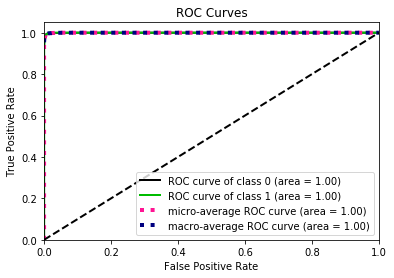


 ===============Results for ================== 

Accuracy 0.874671669793621
F1-score [0.90982721 0.79458795]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      1693
           1       0.99      0.66      0.79       972

    accuracy                           0.87      2665
   macro avg       0.91      0.83      0.85      2665
weighted avg       0.89      0.87      0.87      2665



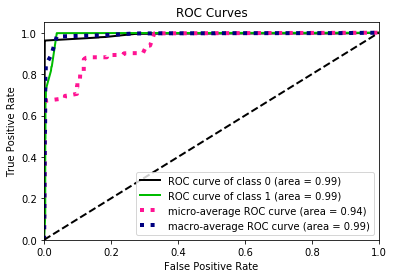


 ===============Results for ================== 

Accuracy 0.9358080393765381
F1-score [0.96079659 0.8229638 ]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7703
           1       0.98      0.71      0.82      2049

    accuracy                           0.94      9752
   macro avg       0.95      0.85      0.89      9752
weighted avg       0.94      0.94      0.93      9752



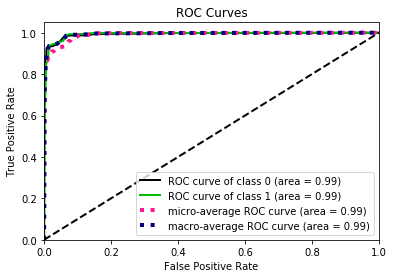

              precision    recall  f1-score      support
0              0.992248  0.997921  0.995076  1924.000000
1              0.992126  0.971098  0.981500   519.000000
accuracy       0.992223  0.992223  0.992223     0.992223
macro avg      0.992187  0.984510  0.988288  2443.000000
weighted avg   0.992222  0.992223  0.992192  2443.000000
              precision    recall  f1-score      support
0              0.837892  0.995275  0.909827  1693.000000
1              0.987768  0.664609  0.794588   972.000000
accuracy       0.874672  0.874672  0.874672     0.874672
macro avg      0.912830  0.829942  0.852208  2665.000000
weighted avg   0.892556  0.874672  0.867796  2665.000000
              precision    recall  f1-score      support
0              0.928131  0.995846  0.960797  7703.000000
1              0.978480  0.710102  0.822964  2049.000000
accuracy       0.935808  0.935808  0.935808     0.935808
macro avg      0.953305  0.852974  0.891880  9752.000000
weighted avg   0.938710  0.9358

In [50]:
doall()

# Boosting

In [51]:
from sklearn.ensemble import AdaBoostClassifier

If None, then the base estimator is DecisionTreeClassifier(max_depth=1).

In [52]:
clf = AdaBoostClassifier(base_estimator=None, n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.994269340974212
F1-score [0.99636364 0.98648649]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443




 ===============Results for ================== 

Accuracy 0.994269340974212
F1-score [0.99636364 0.98648649]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.98      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



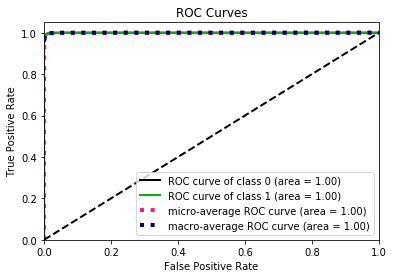


 ===============Results for ================== 

Accuracy 0.9200750469043152
F1-score [0.93967715 0.88160089]
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1693
           1       0.96      0.82      0.88       972

    accuracy                           0.92      2665
   macro avg       0.93      0.90      0.91      2665
weighted avg       0.92      0.92      0.92      2665



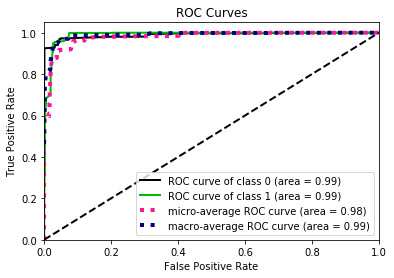


 ===============Results for ================== 

Accuracy 0.9392945036915504
F1-score [0.9623122  0.84404636]
              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7703
           1       0.92      0.78      0.84      2049

    accuracy                           0.94      9752
   macro avg       0.93      0.88      0.90      9752
weighted avg       0.94      0.94      0.94      9752



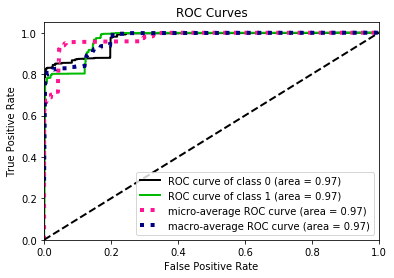

              precision    recall  f1-score      support
0              0.995846  0.996881  0.996364  1924.000000
1              0.988395  0.984586  0.986486   519.000000
accuracy       0.994269  0.994269  0.994269     0.994269
macro avg      0.992120  0.990734  0.991425  2443.000000
weighted avg   0.994263  0.994269  0.994265  2443.000000
              precision    recall  f1-score      support
0              0.902612  0.979917  0.939677  1693.000000
1              0.958888  0.815844  0.881601   972.000000
accuracy       0.920075  0.920075  0.920075     0.920075
macro avg      0.930750  0.897880  0.910639  2665.000000
weighted avg   0.923137  0.920075  0.918495  2665.000000
              precision    recall  f1-score      support
0              0.944160  0.981176  0.962312  7703.000000
1              0.917001  0.781845  0.844046  2049.000000
accuracy       0.939295  0.939295  0.939295     0.939295
macro avg      0.930580  0.881510  0.903179  9752.000000
weighted avg   0.938453  0.9392

In [54]:
doall()

In [76]:
clf = AdaBoostClassifier(base_estimator=RandomForestClassifier(n_estimators=100), n_estimators=100, random_state=0)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

print('Accuracy %s' % accuracy_score(y_test, y_pred))
print('F1-score %s' % f1_score(y_test, y_pred, average=None))
print(classification_report(y_test, y_pred))

Accuracy 0.994269340974212
F1-score [0.99636175 0.98651252]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.99      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



In [79]:
cm = confusion_matrix(X_test, y_pred, labels=None, sample_weight=None, normalize=None)
print(cm)
sns.heatmap(cm, annot=True,fmt="d",cmap='Oranges')

ValueError: Classification metrics can't handle a mix of continuous-multioutput and binary targets

In [81]:
y_test.unique()

array([1, 0])


 ===============Results for ================== 

Accuracy 0.994269340974212
F1-score [0.99636175 0.98651252]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1924
           1       0.99      0.99      0.99       519

    accuracy                           0.99      2443
   macro avg       0.99      0.99      0.99      2443
weighted avg       0.99      0.99      0.99      2443



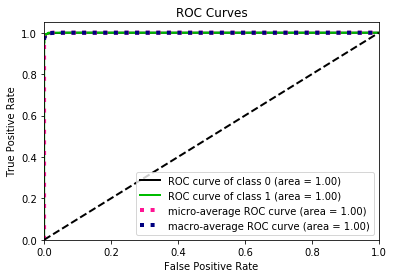


 ===============Results for ================== 

Accuracy 0.9208255159474672
F1-score [0.94074698 0.88072357]
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1693
           1       0.98      0.80      0.88       972

    accuracy                           0.92      2665
   macro avg       0.94      0.90      0.91      2665
weighted avg       0.93      0.92      0.92      2665



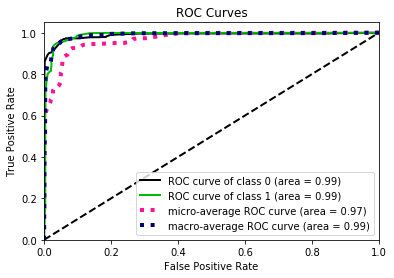


 ===============Results for ================== 

Accuracy 0.949343724364233
F1-score [0.968821   0.86502732]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97      7703
           1       0.98      0.77      0.87      2049

    accuracy                           0.95      9752
   macro avg       0.96      0.88      0.92      9752
weighted avg       0.95      0.95      0.95      9752



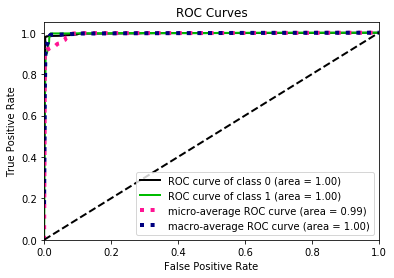

              precision    recall  f1-score      support
0              0.996362  0.996362  0.996362  1924.000000
1              0.986513  0.986513  0.986513   519.000000
accuracy       0.994269  0.994269  0.994269     0.994269
macro avg      0.991437  0.991437  0.991437  2443.000000
weighted avg   0.994269  0.994269  0.994269  2443.000000
              precision    recall  f1-score      support
0              0.896681  0.989368  0.940747  1693.000000
1              0.977415  0.801440  0.880724   972.000000
accuracy       0.920826  0.920826  0.920826     0.920826
macro avg      0.937048  0.895404  0.910735  2665.000000
weighted avg   0.926127  0.920826  0.918855  2665.000000
              precision    recall  f1-score      support
0              0.942759  0.996365  0.968821  7703.000000
1              0.982619  0.772572  0.865027  2049.000000
accuracy       0.949344  0.949344  0.949344     0.949344
macro avg      0.962689  0.884469  0.916924  9752.000000
weighted avg   0.951134  0.9493

In [57]:
doall()